# Análise de votações na câmara dos deputados do Brasil

Este é um trabalho para a classe Fundamentos da Matemática para Computação, UFABC, Professor Ronaldo.


Importo as bibliotecas utilizadas para o processamento do script

In [1]:
import pandas as pd #dataframe lib
import matplotlib.pyplot as plt #plot lib
import glob # encontrar pathnames
import unicodedata # unicode parser
import numpy as np # processamento numérico
from numpy.linalg import svd
from collections import Counter
from scipy.spatial.distance import pdist,squareform # cálculo de distâncias


Esta linha é utilizada pelo Jupyter Notebook para formatar os gráficos gerados pelo matplotlib

In [2]:
%matplotlib inline

Carrega todos os dados da pasta "dados_camara" e mesclo tudo em um únido dataframe, dando um join nos dados pelas colunas: nome, partido e uf

In [3]:
votacoes = None
matchColumns = ["nome","partido","uf"]
files = ['./dados_camara/'+str(ano)+'.csv' for ano in range(1995,1999)]
#files = glob.glob('./dados_senado/*.csv')
#files = glob.glob('./dados_camara/*.csv')
for _file in files:
    if votacoes is None:
        votacoes = pd.read_csv(_file, encoding='utf-8')
    else:
        votacoes = pd.merge(left=votacoes, right=pd.read_csv(_file, encoding='utf-8'), how="outer", left_on=matchColumns, right_on=matchColumns)

In [4]:
files

['./dados_camara/1995.csv',
 './dados_camara/1996.csv',
 './dados_camara/1997.csv',
 './dados_camara/1998.csv']

Preencho os valores nulos com zeros

In [5]:
votacoes.fillna(0, inplace=True)

In [6]:
votacoes.head()

nome partido  uf  PDC 160/1995  PDC 443/1994  PDC 451/1995  \
0     Valdenor Guedes     PPB  AP           0.0           0.0           0.0   
1     Severiano Alves     PDT  BA           0.0          -1.0           0.0   
2      Félix Mendonça     PTB  BA           1.0           1.0           1.0   
3  Geddel Vieira Lima    PMDB  BA           0.0           0.0           1.0   
4      Jairo Carneiro     PFL  BA           1.0           1.0           0.0   

   PDC 451/1995.1  PDC 451/1995.2  PDC 452/1995  PDC 452/1995.1  \
0             0.0             0.0           0.0             0.0   
1             0.0             0.0           0.0             0.0   
2             1.0             1.0           1.0             0.0   
3             0.0             1.0           1.0             1.0   
4             0.0             0.0           0.0             0.0   

        ...        PL 4606/1998.1  PL 4606/1998.2  PL 4606/1998.3  \
0       ...                   1.0             1.0             1.0   
1       ...                   0.0             0.0            -1.0   
2       ...                   1.0             1.0             0.0   
3       ...                   1.0             0.0             1.0   
4       ...                   1.0             1.0             1.0   

   PL 4606/1998.4  PL 4769/1998  PL 518/1995  PLP 216/1998  PLP 216/1998.1  \
0            -1.0           1.0          1.0          -1.0             1.0   
1             0.0           0.0          1.0           1.0             0.0   
2            -1.0           1.0          1.0          -1.0             1.0   
3            -1.0           1.0          1.0           0.0             1.0   
4            -1.0           1.0          1.0          -1.0             1.0   

   PLP 216/1998.2  PLP 216/1998.3  
0             1.0             1.0  
1            -1.0            -1.0  
2             1.0             1.0  
3             1.0             1.0  
4             1.0             1.0  

[5 rows x 467 columns]

Seleciono os votos que não tem series zeradas e seleciono as votacões com base nestes votos filtrados

In [7]:
votos = votacoes.iloc[:,3:votacoes.shape[1]]
votos = votos[(votos.T != 0).any()]
votacoes = votacoes.iloc[votos.index.tolist(),:].reset_index(drop=True)

Seleciono os estados e converto o formato para unicode

In [8]:
estados = votacoes.uf
estados = pd.Series([unicodedata.normalize("NFKD", e).strip() for e in estados])

Separado os estados por regiões

In [9]:
estados_regioes = {('SP','MG','RJ','ES') : 'SE' ,
           ('DF','MT','MS','GO') : 'CO' ,
           ('RS','PR','SC') : 'SU' ,
           ('AL','BA','CE','MA','PB','PE','PI','RN','SE') : 'NE',
           ('AC','AP','AM','PA','RO','RR','TO') : 'NO'}

In [10]:
regioes = pd.Series([estados_regioes[k] for e in estados for k in estados_regioes.keys()  if e in k])

Seleciono deputados e partidos

In [11]:
deputados = votacoes.nome

In [12]:
partidos = votacoes.partido

In [28]:
deputados

0               Valdenor Guedes
1               Severiano Alves
2                Félix Mendonça
3            Geddel Vieira Lima
4                Jairo Carneiro
5                Claudio Cajado
6                    José Rocha
7                 Aroldo Cedraz
8           José Carlos Aleluia
9                 Jutahy Junior
10                José Linhares
11                José Pimentel
12                 Aníbal Gomes
13             Marcelo Teixeira
14               Roberto Pessoa
15                 Rommel Feijó
16               Vicente Arruda
17                Inácio Arruda
18               Osório Adriano
19              Rose de Freitas
20                 Vilmar Rocha
21               Ronaldo Caiado
22               Jovair Arantes
23                Gastão Vieira
24            Sebastião Madeira
25            Ibrahim Abi-Ackel
26      Márcio Reinaldo Moreira
27                Paulo Delgado
28               Fernando Diniz
29             Silas Brasileiro
                 ...           
1440    

In [35]:
partidos.groupby(0)

TypeError: 'unicode' object is not callable

Calculo a matriz de correspondência

In [13]:
corr = np.corrcoef(votos)

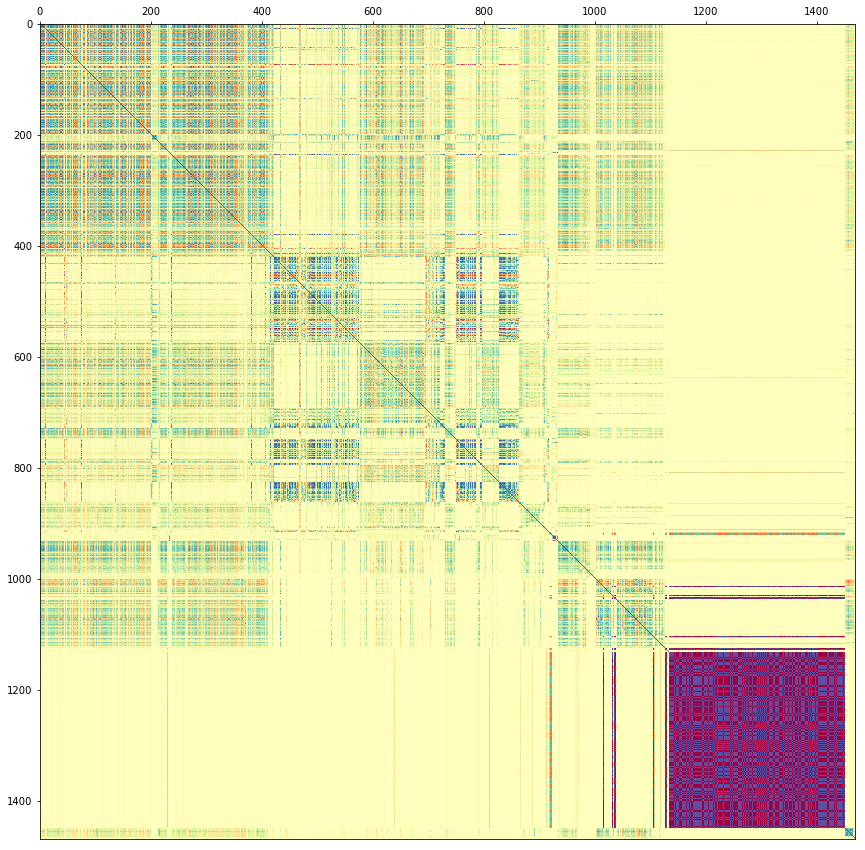

In [14]:
fig,ax = plt.subplots(figsize=(20,15))
ax.imshow(corr,cmap=plt.get_cmap('Spectral'))
#ax.set_yticks(range(len(deputados)))
#ax.set_yticklabels(deputados)
#ax.set_xticks(range(len(deputados)))
#ax.set_xticklabels(deputados,rotation=90)
ax.xaxis.tick_top()
plt.show()

In [15]:
U, Sigma, V = svd(corr)

In [16]:
afinidade = U[:,0]

In [17]:
cut =  np.sum(afinidade < np.mean(afinidade)) - 0.5

In [18]:
iafinidade = np.argsort(afinidade)
corr_afinidade = corr[iafinidade,:]
corr_afinidade = corr_afinidade[:,iafinidade]

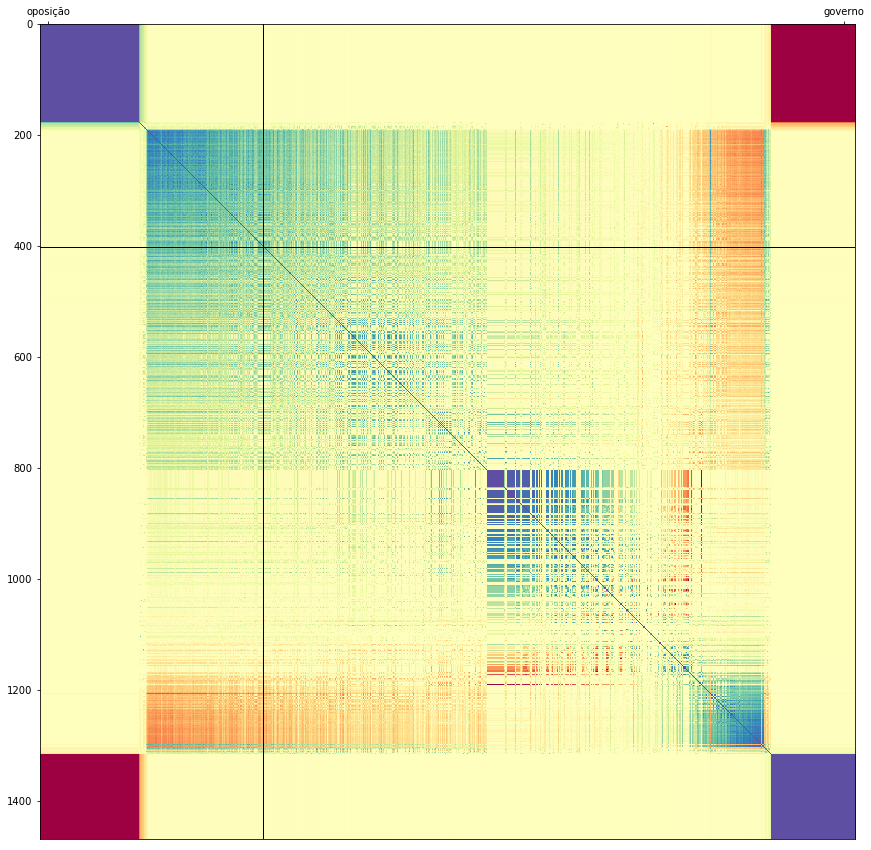

In [19]:
fig,ax = plt.subplots(figsize=(20,15))
ax.imshow(corr_afinidade,cmap=plt.get_cmap('Spectral'))
ax.plot([0,deputados.shape[0]-1],[cut,cut],color='black',lw=1)
ax.plot([cut,cut],[0,deputados.shape[0]-1],color='black',lw=1)
ax.set_xticks([15,deputados.shape[0]-20])
#ax.set_yticks(range(len(deputados)))
ax.set_xticklabels([u"oposição",u"governo"])
#ax.set_yticklabels(deputados[iafinidade])
ax.xaxis.tick_top()
plt.show()

In [20]:
part_ord = np.lexsort([iafinidade,partidos])
corr_partido = corr[part_ord,:]
corr_partido = corr_partido[:,part_ord]

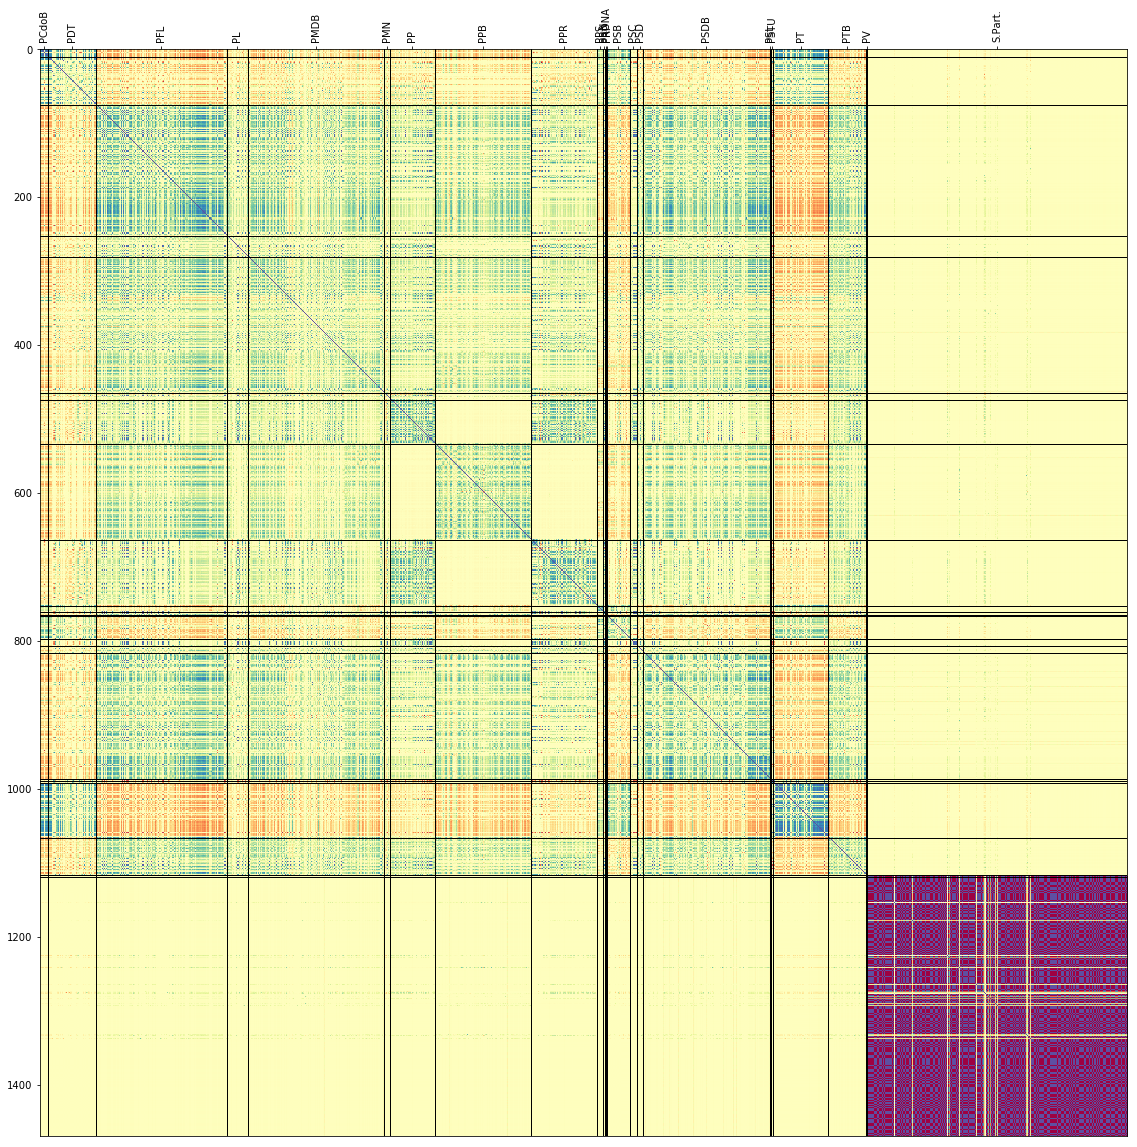

In [21]:
splits = [i for i in range(len(partidos)-1) if partidos.iloc[i] != partidos.iloc[i+1]]
fig,ax = plt.subplots(figsize=(100,20))
partido_ord=pd.Series(partidos[part_ord].reset_index(drop=True))
splits = [i for i in range(len(partido_ord)-1) if partido_ord.iloc[i] != partido_ord.iloc[i+1]]
cj_partidos = set(partido_ord) 

pos = [np.mean(np.where(partido_ord==p))  for p in cj_partidos]

ax.imshow(corr_partido ,cmap=plt.get_cmap('Spectral'))
for i in splits:
    ax.plot([0,deputados.shape[0]-1],[i+0.5,i+0.5],color='black',lw=1)
    ax.plot([i+0.5,i+0.5],[0,deputados.shape[0]-1],color='black',lw=1)

ax.set_xticks(pos)
#ax.set_yticks(range(len(deputados)))
ax.set_xticklabels(cj_partidos,rotation=90)
#ax.set_yticklabels(deputados[part_ord])
ax.xaxis.tick_top()


plt.show()    

In [22]:
part_ord = np.lexsort([iafinidade,partidos])
corr_partido = corr[part_ord,:]
corr_partido = corr_partido[:,part_ord]

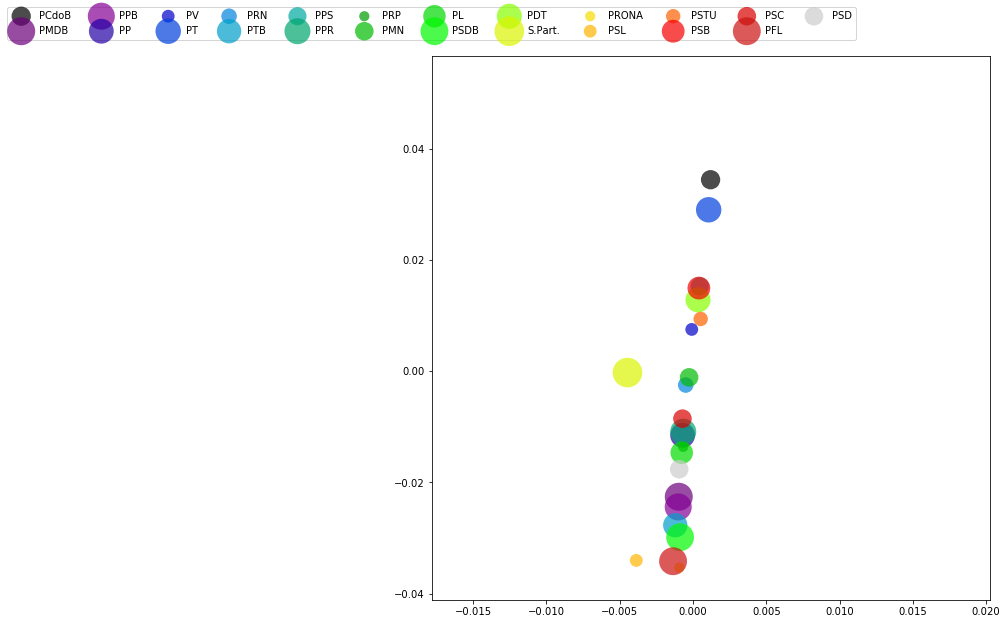

In [23]:
rgb_values = plt.get_cmap("nipy_spectral", len(cj_partidos))
colors = [rgb_values(i) for i in range(len(cj_partidos))]
cmap = dict(zip(cj_partidos,colors))
counts = Counter(partidos)

fig, ax = plt.subplots(figsize=(10,10))
for p in cj_partidos:
    pts = partidos[partidos==p].index
    ax.scatter(np.mean(U[pts,0]),np.mean(U[pts,1]), c=cmap[p], s = np.log(counts[p]+1)*150, label=p,
               alpha=0.7, edgecolors='none')

ax.legend(loc=9,ncol=(len(cj_partidos)+1)//2,bbox_to_anchor=(0, 1.1))
plt.show()

## Análise de regiões

In [24]:
reg_ord = np.lexsort([iafinidade,regioes])
corr_regiao = corr[reg_ord,:]
corr_regiao = corr_regiao[:,reg_ord]

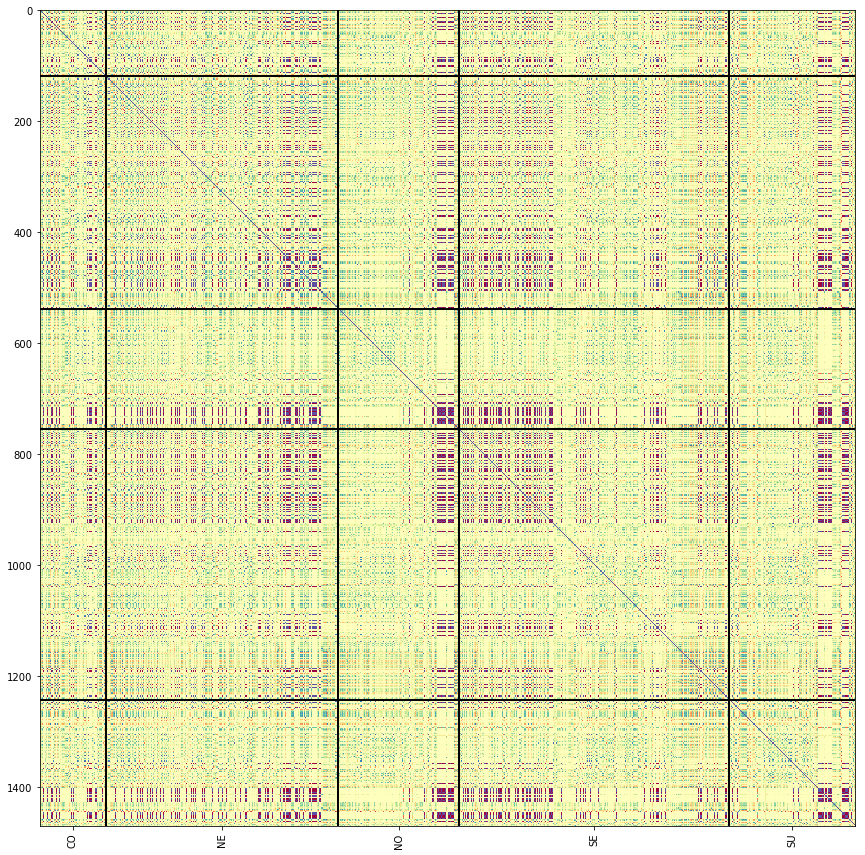

In [25]:
fig,ax = plt.subplots(figsize=(20,15))
regioes_ord = pd.Series(regioes[reg_ord].reset_index(drop=True))
splits = [i for i in range(len(regioes_ord)-1) if regioes_ord[i] != regioes_ord[i+1]]
cj_regioes = set(regioes_ord) 
pos = [np.mean(np.where(regioes_ord==p))  for p in cj_regioes]

ax.imshow(corr_regiao,cmap=plt.get_cmap('Spectral'))
for i in splits:
    ax.plot([0,votos.shape[0]-1],[i+0.5,i+0.5],color='black',lw=2)
    ax.plot([i+0.5,i+0.5],[0,votos.shape[0]-1],color='black',lw=2)
    
ax.set_xticks(pos)
#ax.set_yticks(range(len(deputados)))
ax.set_xticklabels(cj_regioes,rotation=90)
#ax.set_yticklabels(deputados[reg_ord])
plt.show()

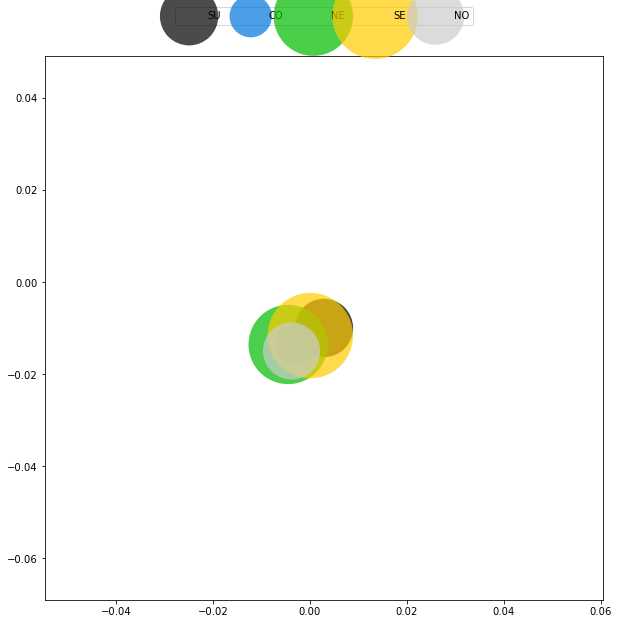

In [26]:
rgb_values = plt.get_cmap("nipy_spectral", len(cj_regioes))
colors = [rgb_values(i) for i in range(len(cj_regioes))]
cmap = dict(zip(cj_regioes,colors))
counts = Counter(regioes)

fig, ax = plt.subplots(figsize=(10,10))
for p in cj_regioes:
    pts = regioes[regioes==p].index
    ax.scatter(np.mean(U[pts,0]),np.mean(U[pts,1]), c=cmap[p], s = counts[p]*15, label=p,
               alpha=0.7, edgecolors='none')

ax.legend(loc=9,ncol=(len(cj_partidos)+1)//2,bbox_to_anchor=(0.5, 1.1))
plt.show()

### Previsão de votação

In [27]:
acertos = []
por_partido = {
    'PT' : [],
    'PMDB' : [],
    'PSDB' : [],
}
for votacao in range(1,votos.shape[1]):
    d = squareform(pdist(votos.iloc[:,range(votacao)]))
    np.fill_diagonal(d,float('inf'))
    nn = [np.random.choice(np.argwhere(d[i,:] == np.amin(d[i,:]))[0]) for i in range(len(d))] 
    prediction = votos.iloc[nn,votacao].reset_index(drop=True)
    acertos.append(np.mean(prediction == votos.iloc[:,votacao]))
    for p in por_partido.keys():
        sset = np.where(partidos==p)[0]
        por_partido[p].append(np.mean(prediction.iloc[sset] == votos.iloc[sset,votacao]))

ValueError: Can only compare identically-labeled Series objects

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(acertos,label="Geral")
for p in por_partido.keys():
    ax.plot(por_partido[p],label=p,alpha=0.5)
ax.legend(loc=9,ncol=4,bbox_to_anchor=(0.5, 1.03))
plt.show()